In [2]:
#videos_data- list of dict, where each dict store video_id, views, complete_views

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
import requests

In [4]:
def get_ranking(video_data, factor):
    rand_var = []
    for video in video_data:
        pos_cnt = video['complete_views']
        neg_cnt = video['views'] - video['complete_views']
        rand_var.append((video['video_id'], np.random.beta(1+factor*pos_cnt, 1+factor*neg_cnt)))
    output = sorted(rand_var, key=lambda x : x[1], reverse=True)
    return [x[0] for x in output]

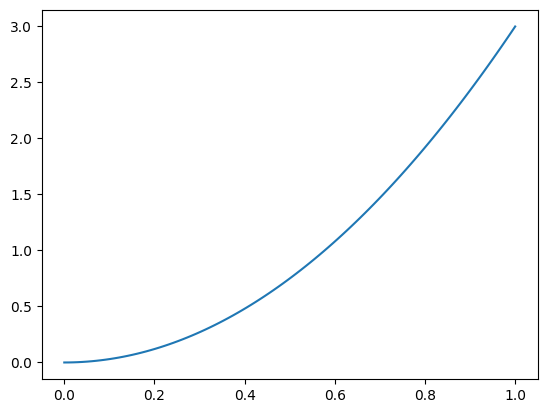

In [11]:
x_axis = np.linspace(0,1,100)
plt.plot(x_axis, beta.pdf(x_axis, 3, 1))

In [5]:
video_data = [
    {
        'video_id' : 'a1',
        'views' : 465,
        'complete_views' : 400
    },
    {
        'video_id' : 'a2',
        'views' : 465,
        'complete_views' : 200
    },
    {
        'video_id' : 'a3',
        'views' : 465,
        'complete_views' : 300
    },
    {
        'video_id' : 'a4',
        'views' : 46,
        'complete_views' : 35
    },
]
get_ranking(video_data, 0.1)

['a1', 'a4', 'a3', 'a2']

In [8]:
video_count = 1000
video_data = []
for i in range(video_count):
    video = dict()
    video['video_id'] = 'v'+str(i)
    video['views'] = np.random.randint(1000000)+1
    video['complete_views'] = np.random.randint(video['views'])
    video_data.append(video)

In [12]:
%%time
order = get_ranking(video_data, 0.1)
send_data = {'initialScore' : 0,
             'list' : order}

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.72 ms
